In [121]:
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
import sys
import numpy as np
from sklearn import preprocessing
import pandas as pd
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [122]:
x_train = np.genfromtxt( 'C:/Users/JUNIA/Desktop/Documents/DM/Project/X_train.csv' ,delimiter=',', dtype=float,skip_header=1, usecols=range(1,14));

In [123]:
y_train = np.genfromtxt( 'C:/Users/JUNIA/Desktop/Documents/DM/Project/X_train.csv' ,delimiter=',', dtype=float,skip_header=1, usecols=range(14,15));

In [124]:
x_test = np.genfromtxt( 'C:/Users/JUNIA/Desktop/Documents/DM/Project/X_test.csv' ,delimiter=',', dtype=float,skip_header=1, usecols=range(1,14));

In [125]:
y_test = np.genfromtxt( 'C:/Users/JUNIA/Desktop/Documents/DM/Project/X_test.csv' ,delimiter=',', dtype=float,skip_header=1, usecols=range(14,15));

## Random Forests

In [126]:
numBaseClassifiers = 500
maxdepth = 10
trainAcc = []
testAcc = []

clf = ensemble.RandomForestClassifier(n_estimators=numBaseClassifiers)
clf.fit(x_train, y_train)
Y_predTrain = clf.predict(x_train)
Y_predTest = clf.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print(Y_predTest)
print('Linear classifier accuracy = %.4f' % (accuracy_score(y_test, Y_predTest)))

[ 1.  2. 14. 19. 14.  6.  7.  8.  9.  8. 11. 12.  7. 14. 15. 16. 17. 34.
  4. 20. 21. 22. 23. 24. 25.  3. 27. 28. 29. 30. 31. 32. 33. 18. 35.]
Linear classifier accuracy = 0.7429


## Bagging

In [127]:
numBaseClassifiers = 500
maxdepth = 10


clf = ensemble.BaggingClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(x_train, y_train)
Y_predTrain = clf.predict(x_train)
Y_predTest = clf.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print(Y_predTest)
print('Linear classifier accuracy = %.4f' % (accuracy_score(y_test, Y_predTest)))

[ 1.  2. 14. 19. 14. 30.  7.  8.  9.  8. 26. 12. 12. 14. 15. 16. 17. 34.
 19. 20. 21. 22. 23. 24. 25. 14. 27. 28. 29. 30. 31. 22. 33. 18. 35.]
Linear classifier accuracy = 0.6857


## Adaboost

In [128]:
numBaseClassifiers = 500
maxdepth = 10

clf = ensemble.AdaBoostClassifier(DecisionTreeClassifier(max_depth=maxdepth),n_estimators=numBaseClassifiers)
clf.fit(x_train, y_train)
Y_predTrain = clf.predict(x_train)
Y_predTest = clf.predict(x_test)
trainAcc.append(accuracy_score(y_train, Y_predTrain))
testAcc.append(accuracy_score(y_test, Y_predTest))
print(Y_predTest)
print('Linear classifier accuracy = %.4f' % (accuracy_score(y_test, Y_predTest)))

[ 1.  2. 14. 19. 14.  6.  7.  8.  9.  8. 11. 12. 12. 14. 15. 16. 17. 34.
 19. 20. 21. 22. 16. 24. 25.  3. 27. 28. 29. 30. 31. 32. 33. 18. 35.]
Linear classifier accuracy = 0.7429


In [129]:
testAcc

[0.7428571428571429, 0.6857142857142857, 0.7428571428571429]

## Test Accuracies

<BarContainer object of 3 artists>

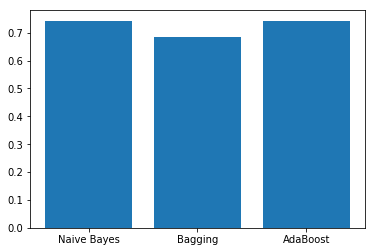

In [130]:
import matplotlib.pyplot as plt
%matplotlib inline

methods = ['Naive Bayes', 'Bagging', 'AdaBoost']
plt.bar(methods, testAcc)

## Training & Test Accuracies

[Text(0,0,'Random Forest'), Text(0,0,'Bagging'), Text(0,0,'AdaBoost')]

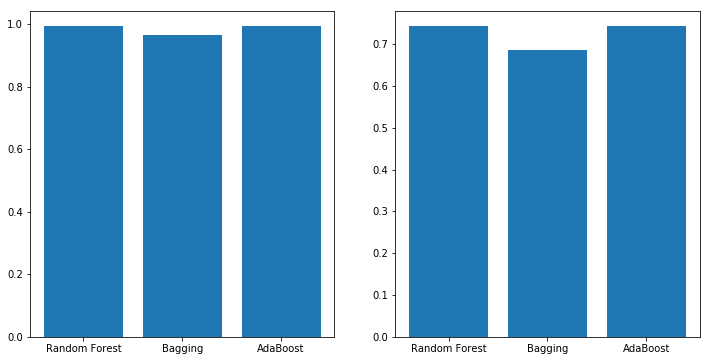

In [131]:
methods = ['Random Forest', 'Bagging', 'AdaBoost']
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
ax1.bar([1.5,2.5,3.5], trainAcc)
ax1.set_xticks([1.5,2.5,3.5])
ax1.set_xticklabels(methods)
ax2.bar([1.5,2.5,3.5], testAcc)
ax2.set_xticks([1.5,2.5,3.5])
ax2.set_xticklabels(methods)